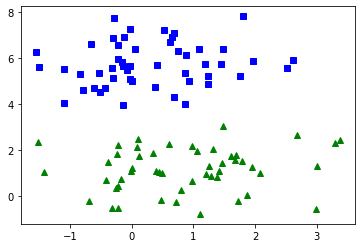

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

#Create linearly separable dataset - repeated manually until correct
#X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

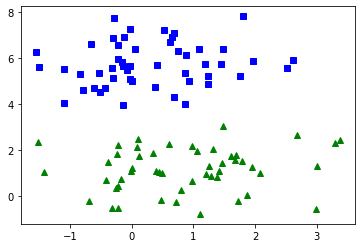

In [4]:
import joblib
#joblib.dump(X,"X_lin_sep.pkl")
#joblib.dump(y,"y_lin_sep.pkl")

X = joblib.load ("X_lin_sep.pkl")
y = joblib.load ("y_lin_sep.pkl")

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()


In [16]:
import numpy as np

def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

[[-0.15432719  2.44736924]]
[0.09618268]


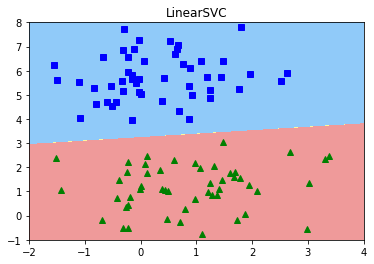

In [18]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lsvc_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_SVC",LinearSVC(C=1, loss='hinge')) 
    ])

lsvc_clf.fit(X,y)
print(lsvc_clf.named_steps['linear_SVC'].coef_)
print(lsvc_clf.named_steps['linear_SVC'].intercept_)

plt.title("LinearSVC")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')

plot_decision_boundary(lsvc_clf,axis = [-2,4,-1,8])

plt.show()

[[-0.15703302  2.49027907]]
[0.11540206]


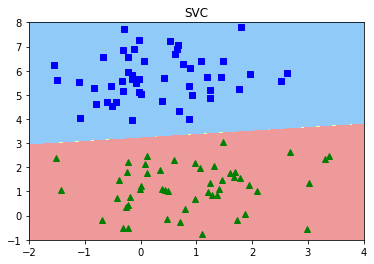

In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svc_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("SVC", SVC(kernel = "linear",C=1)) 
    ])

svc_clf.fit(X,y)

print(svc_clf.named_steps['SVC'].coef_)
print(svc_clf.named_steps['SVC'].intercept_)

plt.title("SVC")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')

plot_decision_boundary(svc_clf,axis = [-2,4,-1,8])


LinearSVC and SVC(kernel="linear") produce similar results with a reasonable margin around the classification boundary

[[-3.27708928 24.81900057]]
[0.06553733]
7


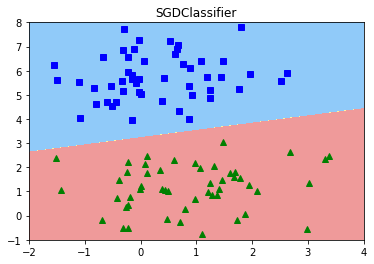

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lsgd_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("lsgd", SGDClassifier()) 
    ])

lsgd_clf.fit(X,y)

print(lsgd_clf.named_steps['lsgd'].coef_)
print(lsgd_clf.named_steps['lsgd'].intercept_)
print(lsgd_clf.named_steps['lsgd'].n_iter_)

plt.title("SGDClassifier")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')

plot_decision_boundary(lsgd_clf,axis = [-2,4,-1,8])


SGDClassifier with default gives a classification with a much smaller margin

[[-0.17180092  1.44997459]]
[0.00280557]
14


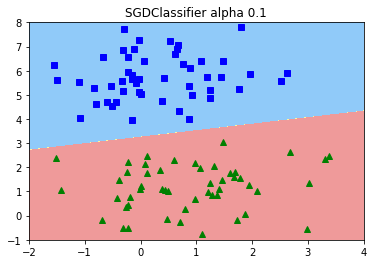

In [43]:
lsgd_clf2 = Pipeline([
    ("scaler",StandardScaler()),
    ("lsgd", SGDClassifier(alpha=0.1)) 
    ])

lsgd_clf2.fit(X,y)

print(lsgd_clf2.named_steps['lsgd'].coef_)
print(lsgd_clf2.named_steps['lsgd'].intercept_)

print(lsgd_clf2.named_steps['lsgd'].n_iter_)

plt.title("SGDClassifier alpha 0.1")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')

plot_decision_boundary(lsgd_clf2,axis = [-2,4,-1,8])

[[-0.16248293  1.45013886]]
[0.01104362]
13


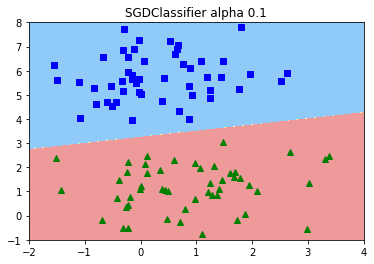

In [47]:
lsgd_clf3 = Pipeline([
    ("scaler",StandardScaler()),
    ("lsgd", SGDClassifier(alpha = 0.1,tol=1e-5)) 
    ])

lsgd_clf3.fit(X,y)

print(lsgd_clf3.named_steps['lsgd'].coef_)
print(lsgd_clf3.named_steps['lsgd'].intercept_)
print(lsgd_clf3.named_steps['lsgd'].n_iter_)

plt.title("SGDClassifier alpha 0.1")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')

plot_decision_boundary(lsgd_clf3,axis = [-2,4,-1,8])